<a href="https://colab.research.google.com/github/prithwis/parashar21/blob/main/P21_PAC_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://1.bp.blogspot.com/_5QlanosqxiQ/SXLOLTu7S7I/AAAAAAAAAm8/0r6C7lCxsic/S1600-R/p21-header-003.png) <br>


---


![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png) ||
[Prithwis Mukerjee](http://www.yantrajaal.com) ||
Website - [Parashar21](https://parashar21.blogspot.com)<br>

#Install, Import

In [1]:
#https://python-docx.readthedocs.io/en/latest/
!pip install python-docx 



     |████████████████████████████████| 5.6 MB 4.6 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184508 sha256=c854d939c1031c10ccfdd056fe0b87b4696840b5ab678f090749612dea9e719c
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [2]:
#import functools
import math
import numbers
import json
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Inches
from datetime import datetime
from datetime import timedelta

In [15]:
#Beginning of List
BoL = ' '

References <br>
1. KNRao & KARao - Learning Hindu Astrology Easily LHAE

In [3]:
#Horoscope is defined in terms of Natal Longitudes and Retrogrades
#This data will either be entered manually from any other source or read from a .py21 file built by the Parashar21 program
#
# person #1
#GLon = {"La":98.5,"Su":178.9,"Mo":250.6,"Ma":196.2,"Me":193.2,"Ju":274.8,"Ve":153.8,"Sa":270.2,"Ra":122.1,"Ke":302.1}
#GRet = {"La":False,"Su":False,"Mo":False,"Ma":False,"Me":True,"Ju":False,"Ve":False,"Sa":False,"Ra":True,"Ke":True}
# person #2
#GLon = {"La":310.4,"Su":243.7,"Mo":201.0,"Ma":273.5,"Me":222.3,"Ju":62.8,"Ve":285.0,"Sa":318.2,"Ra":41.3,"Ke":221.3}
#GRet = {"La":False,"Su":False,"Mo":False,"Ma":False,"Me":False,"Ju":True,"Ve":False,"Sa":False,"Ra":True,"Ke":True}

p21 files containg Horoscope data can be built using [Parashar21- Cast](https://colab.research.google.com/drive/1SkUWu_AED385c3a-D-4OFMICwEA3dhid) notebook

In [4]:
# Mount G-drive and load py21 files 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#!cp /content/drive/"My Drive"/Personal/Parashar21/py21-files/*.py21 .
!cp /content/drive/"My Drive"/Prithwis/Parashar21/py21-files/*.py21 .
!ls *.py21

DaVinci.py21  itAnch.py21  niCha01.py21  wrCal02.py21
imCal02.py21  NDModi.py21  pmCal02.py21


#Utility Functions

In [6]:
#converting dict{ionary} to list and back

d2l = lambda dic: [(k, v) for (k, v) in dic.items()]
l2d = lambda lis: dict(lis)

# Plots the chart in the Bengal Format

#ChartFile = pName+ChartType+'.png'

def drawChart_Bengal():

    id = ChartType+'\n'+pName+'\n'+pDate+'\n'+pTime+'\n'+pPlace
    if ChartType == 'Rashi':
        ChartColour = 'orange'
    else:
        ChartColour = 'olive'
    
        
    #plt.figure(figsize=(7,7))
    plt.figure(figsize=(7,7),facecolor=ChartColour)
    
    plt.axis('off')

    # draw vertical line 
    plt.plot([30, 30], [0, 90], 'k-', lw=2)
    plt.plot([60, 60], [0, 90], 'k-', lw=2)

    # draw horizontal line 
    plt.plot([0, 90], [30, 30], 'k-', lw=2)
    plt.plot([0, 90], [60, 60], 'k-', lw=2)

    #draw diagonal lines
    plt.plot([60,90],[60,90], 'k-', lw=2)
    plt.plot([0,30],[90,60], 'k-', lw=2)
    plt.plot([0,30],[90,60], 'k-', lw=2)
    plt.plot([0,30],[0,30], 'k-', lw=2)
    plt.plot([60,90],[30,0], 'k-', lw=2)

    plt.text(32, 38, id, fontsize=12)

    plt.text(32, 82, txt[1], fontsize=12)
    plt.text(8, 82, txt[2], fontsize=12)
    plt.text(2, 62, txt[3], fontsize=12)
    plt.text(2, 45, txt[4], fontsize=12)
    plt.text(2, 25, txt[5], fontsize=12)
    plt.text(8, 5, txt[6], fontsize=12)
    plt.text(32, 5, txt[7], fontsize=12)
    plt.text(62, 5, txt[8], fontsize=12)
    plt.text(68, 25, txt[9], fontsize=12)
    plt.text(68, 45, txt[10], fontsize=12)
    plt.text(68, 62, txt[11], fontsize=12)
    plt.text(62, 82, txt[12], fontsize=12)

    
    plt.savefig("CurrentChart.png", bbox_inches='tight')
    plt.show()

    
print ("drawChart_Bengal defined")



drawChart_Bengal defined


#Read Data File <br>
after setting the input file name in the next cell, all cells after this current cell can be run in one shot, if so desired

In [7]:
#Define Input File 

#f2 = open("wrCal02.py21","r")
#f2 = open("niCha01.py21","r")
#f2 = open("pmCal02.py21","r")
#f2 = open("imCal02.py21","r")
f2 = open("NDModi.py21","r")
#f2 = open("itAnch.py21","r")

In [8]:
#Horoscope is defined in terms of Natal Longitudes and Retrogrades
#This data will either be entered manually or read from a file created by Ephemeris program
#

GLon = {}
GRet = {}

l = 1
for line in f2:
  if l == 1:
    fields = line.split(',')
    for O in range(10):
        k = fields[O][:2]
        v = fields[O][3:]
        #print(k,v)
        GLon[k] = float(v)
    l=l+1
  elif l == 2:
    fields = line.split(',')
    for O in range(10):
        k = fields[O][:2]
        v = fields[O][3:]
        #print(k,v)
        GRet[k] = bool(v == 'True')
    l=l+1
  else:
    fields = line.split(';')
    for O in range(3):
        pName = fields[0]
        pDate = fields[1]
        pTime = fields[2]
        pPlace = fields[3]
        #print(k,v)
        
  
print(GLon)
print(GRet)
print(pName,pDate,pTime,pPlace)

{'La': 191.213, 'Su': 150.533, 'Mo': 217.939, 'Ma': 210.889, 'Me': 150.848, 'Ju': 306.602, 'Ve': 135.613, 'Sa': 149.644, 'Ra': 335.211, 'Ke': 155.211}
{'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': True, 'Ju': True, 'Ve': False, 'Sa': False, 'Ra': False, 'Ke': False}
NDModi 1950-9-17 9:34 Vadnagar, India


# Primary Calculations

##Navamsa or Rashichakra ?

In [9]:
#Specify the kind of chart to be created, analysed

#ChartType = 'Navamsa'
ChartType = 'Rashi'


#converts a Rashi number to the Rashi name
#
RashiName = ["RashiName","Ari","Tau","Gem","Can","Leo","Vir","Lib","Sco","Sag","Cap","Acq","Pis"]
def RashiN2A(n):
    return RashiName[n]

##Location of Graha in Rashi

In [10]:
# Convert the longitude of a Graha into its Rashi of residence
#
# Navamsa is different
# http://www.oocities.org/talk2astrologer/LearnAstrology/Details/Navamsa.html
#
# the logic for placing a Graha in a 'Navamsa' Rashi is as follows
# starting from Longitude 0 [ 'Normal' Aries / Mesha start point]
# upto Longitude 360, we divide the longitudes in 108 partitions with each 
# partition being 3.33333 degrees. These 108 partitions are now numbered 
# sequentially, except that once we reach 12, the next partition is 1, not
# 13. So we have 9 sequences running from 1 - 12 each. The number corresponding
# to the partition where the Graha falls is the Navamsa Rashi of the Graha


def Long2Rashi(x):
    if ChartType == 'Rashi':
        RashiNumber = math.floor(x[1]/30)+1
        return x[0],RashiNumber
    if ChartType == 'Navamsa':
        N1 = math.floor(x[1]/3.333333)+1
        N2 = N1%12
        if N2 == 0:
            RashiNumber = 12
        else:
            RashiNumber = N2
        return x[0],RashiNumber
   
    

In [11]:
#Defines the Horoscope in terms of locating planets in their Rashis
#
GRashiN = l2d(list(map(lambda x : Long2Rashi(x), d2l(GLon))))
print(GRashiN)

GRashiA = {}
for k,v in GRashiN.items():
    GRashiA[k] = RashiN2A(v)
    
print(GRashiA)


{'La': 7, 'Su': 6, 'Mo': 8, 'Ma': 8, 'Me': 6, 'Ju': 11, 'Ve': 5, 'Sa': 5, 'Ra': 12, 'Ke': 6}
{'La': 'Lib', 'Su': 'Vir', 'Mo': 'Sco', 'Ma': 'Sco', 'Me': 'Vir', 'Ju': 'Acq', 'Ve': 'Leo', 'Sa': 'Leo', 'Ra': 'Pis', 'Ke': 'Vir'}


## Draw Chart

In [12]:
txt = ['']*13
for g,r in GRashiN.items():
    if r == 1:
        txt[1]= txt[1]+' '+g+('/R' if GRet[g] else '')
    if r == 2:
        txt[2]= txt[2]+' '+g+('/R' if GRet[g] else '')
    if r == 3:
        txt[3]= txt[3]+' '+g+('/R' if GRet[g] else '')
    if r == 4:
        txt[4]= txt[4]+' '+g+('/R' if GRet[g] else '')
    if r == 5:
        txt[5]= txt[5]+' '+g+('/R' if GRet[g] else '')
    if r == 6:
        txt[6]= txt[6]+' '+g+('/R' if GRet[g] else '')
    if r == 7:
        txt[7]= txt[7]+' '+g+('/R' if GRet[g] else '')
    if r == 8:
        txt[8]= txt[8]+' '+g+('/R' if GRet[g] else '')
    if r == 9:
        txt[9]= txt[9]+' '+g+('/R' if GRet[g] else '')
    if r == 10:
        txt[10]= txt[10]+' '+g+('/R' if GRet[g] else '')
    if r == 11:
        txt[11]= txt[11]+' '+g+('/R' if GRet[g] else '')
    if r == 12:
        txt[12]= txt[12]+' '+g+('/R' if GRet[g] else '')
        
for i in range(1,13):
    if len(txt[i]) == 0:
        txt[i] = '*'
#print(txt[1],txt[2],txt[3],txt[4],txt[5],txt[6],txt[7],txt[8],txt[9],txt[10],txt[11],txt[12],)

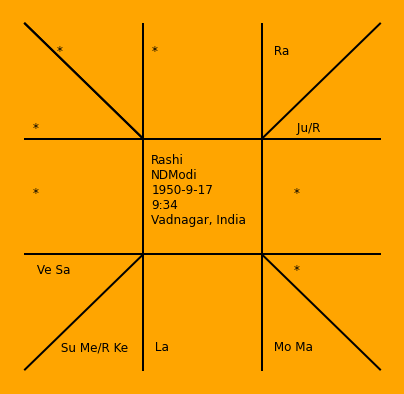

In [13]:
drawChart_Bengal()


##Identifying Bhavs or Houses

In [16]:
#Determines and stores the Bhava in list BhavN
#BhavN[1] has Rashi Number corresponding to First Bhav
#BhavA[2] has the Rashi name corresponding to Second Bhava
#
BhavN = [BoL]
for ix in range(1,13):
    if ix == 1:
        BhavN.append(GRashiN['La'])
    else:
        N = BhavN[ix-1]+1
        if N > 12:
            N = N - 12
        BhavN.append(N)
    
print(BhavN)
BhavA = list(map(lambda x : RashiN2A(x) if isinstance(x, numbers.Integral) else BoL, BhavN))
#print(list(map(lambda x : x, BhavN)))
print(BhavA)

[' ', 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]
[' ', 'Lib', 'Sco', 'Sag', 'Cap', 'Acq', 'Pis', 'Ari', 'Tau', 'Gem', 'Can', 'Leo', 'Vir']


In [17]:
#Determines the Lord of each Bhava
#Determines the Rashi number where each Lord resides
#Determines the Rashi name where each Lord resides
#
LordOf = {"Ari":"Ma","Tau":"Ve","Gem":"Me","Can":"Mo","Leo":"Su","Vir":"Me","Lib":"Ve","Sco":"Ma","Sag":"Ju","Cap":"Sa","Acq":"Sa","Pis":"Ju"}
#print(LordOf)
Lord = list(map(lambda x : LordOf[RashiN2A(x)] if isinstance(x, numbers.Integral) else BoL, BhavN))
print("Lord\n", Lord)
LordRashiN = list(map(lambda x : GRashiN[x] if x != BoL else BoL, Lord))
print("Rashi # of Lord\n",LordRashiN)
LordRashiA = list(map(lambda x : GRashiA[x] if x != BoL else BoL, Lord))
print("Rashi Name of Lord\n",LordRashiA)

Lord
 [' ', 'Ve', 'Ma', 'Ju', 'Sa', 'Sa', 'Ju', 'Ma', 'Ve', 'Me', 'Mo', 'Su', 'Me']
Rashi # of Lord
 [' ', 5, 8, 11, 5, 5, 11, 8, 5, 6, 8, 6, 6]
Rashi Name of Lord
 [' ', 'Leo', 'Sco', 'Acq', 'Leo', 'Leo', 'Acq', 'Sco', 'Leo', 'Vir', 'Sco', 'Vir', 'Vir']


##Bhava where each Graha resides

In [18]:
#Determines the Bhava where Each planet resides
#Lagna always resides in First Bhava
#
GrahaBhava ={"La":1}
for G in ('Su','Mo','Ma','Me','Ju','Ve','Sa','Ra','Ke'):
    GrahaBhava[G] = BhavN.index(GRashiN[G])
print (GrahaBhava)

{'La': 1, 'Su': 12, 'Mo': 2, 'Ma': 2, 'Me': 12, 'Ju': 5, 'Ve': 11, 'Sa': 11, 'Ra': 6, 'Ke': 12}


In [19]:
#Determines the Bhav where each Lord resides
#

LordBhav =[BoL]
for L in range (1,13):
    LordBhav.append(BhavN.index(GRashiN[Lord[L]]))
print(LordBhav)

[' ', 11, 2, 5, 11, 11, 5, 2, 11, 12, 2, 12, 12]


##Bhav where each Graha is Lord

In [20]:
#Determines the Bhava where each Graha is Lord
#Grahas other than Sun and Moon are Lords of Two Bhava
#Since index returns only the first position where an instance is found
#A simple index() does not return the second position
# https://stackoverflow.com/questions/22267241/how-to-find-the-index-of-the-nth-time-an-item-appears-in-a-list

GrahaLordBhav = {}
for G in ('Su','Mo','Ma','Me','Ju','Ve','Sa'):
        L = [i for i, n in enumerate(Lord) if n == G]
        GrahaLordBhav[G] = L
print(GrahaLordBhav)

{'Su': [11], 'Mo': [10], 'Ma': [2, 7], 'Me': [9, 12], 'Ju': [3, 6], 'Ve': [1, 8], 'Sa': [4, 5]}


In [21]:
#
#summary of all data calculated so far
#
#


print("Lords","\n",Lord)
print("Rashi Name of Lord","\n",LordRashiA)
print("Bhava of Graha","\n",GrahaBhava)
print("Bhava of Lord","\n",LordBhav)
print("Bhavas where Graha is Lord","\n",GrahaLordBhav)

#Generating Report
# This cell opens a file for writing.
# This cell cannot be run again until the cell calling the close file is run
#


f1 = open("CurrentReport.txt", 'w')

def NL():
   f1.write("\n")

f1.write("Lords of Bhav \n")
json.dump(Lord, f1)
NL()
f1.write("Rashi Name where Lord Resides \n")
json.dump(LordRashiA, f1)
NL()
f1.write("Bhav where Graha Resides \n")
json.dump(GrahaBhava, f1)
NL()
f1.write("Bhav where Lord Resides \n")
json.dump(LordBhav, f1)
NL()
#f1.write(json.dumps(GrahaLordBhav))
f1.write("Bhav where Graha is Lord \n")
json.dump(GrahaLordBhav, f1)
NL()
f1.write("------------------------------------ \n")
NL()

Lords 
 [' ', 'Ve', 'Ma', 'Ju', 'Sa', 'Sa', 'Ju', 'Ma', 'Ve', 'Me', 'Mo', 'Su', 'Me']
Rashi Name of Lord 
 [' ', 'Leo', 'Sco', 'Acq', 'Leo', 'Leo', 'Acq', 'Sco', 'Leo', 'Vir', 'Sco', 'Vir', 'Vir']
Bhava of Graha 
 {'La': 1, 'Su': 12, 'Mo': 2, 'Ma': 2, 'Me': 12, 'Ju': 5, 'Ve': 11, 'Sa': 11, 'Ra': 6, 'Ke': 12}
Bhava of Lord 
 [' ', 11, 2, 5, 11, 11, 5, 2, 11, 12, 2, 12, 12]
Bhavas where Graha is Lord 
 {'Su': [11], 'Mo': [10], 'Ma': [2, 7], 'Me': [9, 12], 'Ju': [3, 6], 'Ve': [1, 8], 'Sa': [4, 5]}


#Position

In [22]:
Graha = ['Su','Mo','Ma','Me','Ju','Ve','Sa']

GMalefic = {"Su":False,"Mo":False,"Ma":False,"Me":False,"Ju":True,"Ve":False,"Sa":False,"Ra":True,"Ke":True}

In [23]:
#rather than print out a whole string of False with One or two trues, this prints only the true values

def showTrueDict(text,tDict):
    print(text)                 # writes on terminal
    f1.write(text+"\n")         # writes in text file
    empty = True
    for k,v in tDict.items():
        if v:
            print('-- ',k, text)
            filetxt = '-- '+k+' '+text+'\n'
            f1.write(filetxt)
            empty = False
    if empty:
        print('None')
        f1.write('None'+'\n')
            
def showTrueList(text,tList):
    print(text)
    f1.write(text+"\n")         # writes in text file
    empty = True
    for ix,v in enumerate(tList):
        if v:
            print('-- ',ix, text)
            filetxt = '-- '+str(ix)+' '+text+'\n'
            f1.write(filetxt)
            empty = False
    if empty:
        print('None')
        f1.write('None'+'\n')

##isExalted

In [24]:
#Range of Exaltation
#Ref LHAE - page 30 specifies only certain parts of a Rashi are exalted
exaL = {"La":999,"Su":0,"Mo":30,"Ma":270,"Me":150,"Ju":90,"Ve":330,"Sa":180,"Ra":999,"Ke":999}  # Lower Bound
exaU = {"La":999,"Su":10,"Mo":33,"Ma":298,"Me":165,"Ju":95,"Ve":357,"Sa":200,"Ra":999,"Ke":999}  # Upper Bound

# Alternatively the entire Rashi can be made exalted 

exaR = {'La':99,'Su':1, 'Mo':2, 'Ma':10, 'Me':6,'Ju':4,'Ve':12,'Sa':7,'Ra':99,'Ke':99}


# the low parameter is used to indicate that the entire Rashi is used for exaltation
# the high parameter is used to indicate that only the specific part of the Rashi is used

def checkGexa(x,level = 'low'):
    if level == 'low':
        if GRashiN[x] == exaR[x]:
            return x,True
        else:
            return x,False
        
    if level == 'high':
        lon = GLon[x]
        if lon > exaL[x] and lon <= exaU[x]:
            return x,True
        else:
            return x,False
    
def checkLexa(x):
    if x == BoL:
        return False
    else:
        return exaltG[x]

In [25]:


exaltG = l2d(list(map(lambda x: checkGexa(x), Graha)))               # determines if Graha is Exalted

exaltL = list(map(lambda x: checkLexa(x),Lord))
#print(exaltL)

showTrueDict("Graha Exalted", exaltG)
showTrueList("Lord Exalted", exaltL)
NL()
f1.write("------------------------------------ \n")
NL()

Graha Exalted
--  Me Graha Exalted
Lord Exalted
--  9 Lord Exalted
--  12 Lord Exalted


##isDebilitated

In [26]:
#Range of Debilitation
#Ref LHAE - page 30
debL = {"La":999,"Su":180,"Mo":210,"Ma":90,"Me":330,"Ju":270,"Ve":150,"Sa":0,"Ra":999,"Ke":999}  # Lower Bound
debU = {"La":999,"Su":190,"Mo":213,"Ma":118,"Me":345,"Ju":275,"Ve":177,"Sa":20,"Ra":999,"Ke":999}  # Upper Bound

#Alternatively the entire Rashi can be debilitated

debR = {'La':99,'Su':7, 'Mo':8, 'Ma':4, 'Me':12,'Ju':10,'Ve':6,'Sa':1,'Ra':99,'Ke':99}


def checkGdeb(x, level = 'low'):
    
    if level == 'low':
        if GRashiN[x] == debR[x]:
            return x,True
        else:
            return x,False
    
    if level == 'high':
        lon = GLon[x]
        if lon > debL[x] and lon <= debU[x]:
            return x,True
        else:
            return x,False
    
    
    
def checkLdeb(x):
    if x == BoL:
        return False
    else:
        return debilG[x]

In [27]:
debilG = l2d(list(map(lambda x: checkGdeb(x),Graha)))               # determines if Graha is debilitated

debilL = list(map(lambda x: checkLdeb(x),Lord))
#print(debilL)

showTrueDict("Graha Debilitated", debilG)
showTrueList("Lord Debilitated", debilL)
NL()
f1.write("------------------------------------ \n")
NL()

Graha Debilitated
--  Mo Graha Debilitated
Lord Debilitated
--  10 Lord Debilitated


##atMooltrikana

In [28]:
mool3R = {'La':99,'Su':5, 'Mo':2, 'Ma':1, 'Me':6,'Ju':9,'Ve':7,'Sa':11,'Ra':99,'Ke':99}

def checkm3G(x):
    
    if GRashiN[x] == mool3R[x]:
        return x,True
    else:
        return x,False
    
 

In [29]:
mool3G = l2d(list(map(lambda x: checkm3G(x),Graha))) 
mool3L = [False]*13

for ix in range(1,13):
    #print(ix)
    mool3L[ix] = mool3G[Lord[ix]]
          

showTrueDict("Graha Mooltrikon", mool3G)
showTrueList("Lord Mooltrikon", mool3L)
NL()
f1.write("------------------------------------ \n")
NL()

Graha Mooltrikon
--  Me Graha Mooltrikon
Lord Mooltrikon
--  9 Lord Mooltrikon
--  12 Lord Mooltrikon


##inOwn House

In [30]:
# this has been defined earlier 
#LordOf = {"Ari":"Ma","Tau":"Ve","Gem":"Me","Can":"Mo","Leo":"Su","Vir":"Me","Lib":"Ve","Sco":"Ma","Sag":"Ju","Cap":"Sa","Acq":"Sa","Pis":"Ju"}
# kept here for reference only


def checkOwnHG(x):
    if x == LordOf[GRashiA[x]]:
        return x, True
    else:
        return x, False

ownHouseG = l2d(list(map(lambda x: checkOwnHG(x),Graha)))

ownHouseL = [False]*13

for ix in range(1,13):
    #print(ix)
    ownHouseL[ix] = ownHouseG[Lord[ix]]
    

showTrueDict("Graha Own House", ownHouseG)
showTrueList("Lord Own House", ownHouseL)
NL()
f1.write("------------------------------------ \n")
NL()

Graha Own House
--  Ma Graha Own House
--  Me Graha Own House
Lord Own House
--  2 Lord Own House
--  7 Lord Own House
--  9 Lord Own House
--  12 Lord Own House


##Friendships etc

In [31]:
# page 34

friends = {'Su':['Mo','Ma','Ju'], 'Mo':['Su','Me'],'Ma':['Su','Mo','Ju'],'Me':['Su','Ve'],'Ju':['Su','Mo','Ma'], 'Ve':['Me','Ve'],'Sa':['Me','Sa']}
#print(friends)
enemies ={'Su':['Ve','Sa'],'Mo':[],'Ma':['Me'],'Me':['Mo'],'Ju':['Me','Ve'],'Ve':['Su','Mo','Ma'],'Sa':['Su','Mo']}
#print(enemies)
neutrals = {'Su':['Me'],'Mo':['Ma','Ju','Ve','Sa'],'Ma':['Sa','Ve'],'Me':['Sa','Ma','Ju'],'Ju':['Sa'],'Ve':['Ju'],'Sa':['Ma','Ju']}
#print(neutrals)

#check f(riends)e(nemy)n(eutral)
#
def checkfen(x,Z):
    if LordOf[GRashiA[x]] in Z[x]:
        return x,True
    else:
        return x,False

In [32]:
 
    
inFriendG =  l2d(list(map(lambda x: checkfen(x,friends),Graha)))

inEnemyG =  l2d(list(map(lambda x: checkfen(x,enemies),Graha)))

inNeutralG =  l2d(list(map(lambda x: checkfen(x,neutrals),Graha)))



inFriendL = [False]*13
inEnemyL = [False]*13
inNeutralL = [False]*13

for ix in range(1,13):
    inFriendL[ix] = inFriendG[Lord[ix]]
    inEnemyL[ix] = inEnemyG[Lord[ix]]
    inNeutralL[ix] = inNeutralG[Lord[ix]]
    



showTrueDict("Graha in friend", inFriendG)
showTrueList("Lord in friend", inFriendL)

showTrueDict("Graha in enemy", inEnemyG)
showTrueList("Lord in enemy", inEnemyL)

showTrueDict("Graha in neutral", inNeutralG)
showTrueList("Lord in neutral", inNeutralL)

NL()
f1.write("------------------------------------ \n")
NL()

Graha in friend
None
Lord in friend
None
Graha in enemy
--  Ve Graha in enemy
--  Sa Graha in enemy
Lord in enemy
--  1 Lord in enemy
--  4 Lord in enemy
--  5 Lord in enemy
--  8 Lord in enemy
Graha in neutral
--  Su Graha in neutral
--  Mo Graha in neutral
--  Ju Graha in neutral
Lord in neutral
--  3 Lord in neutral
--  6 Lord in neutral
--  10 Lord in neutral
--  11 Lord in neutral


#Aspects

In [33]:
Gx = ['La','Su', 'Mo', 'Ma', 'Me', 'Ju', 'Ve', 'Sa','Ra','Ke']

def RashiGapA(R2,R1):
    if (R2>R1):
        return R2-R1
    else:
        return R2-R1+12
    
def addToD(x,D,y):
    if x in D:
        D[x].add(y)
    else:
        D[x] = set()
        D[x].add(y)

# convert set in dictionary value to list
# this is required for JSON formatting 

def csidtil(D):
    nD = dict()
    for k in D:
        nD[k] = list(D[k])
        
    #print(nD)
    return(nD)
        

In [34]:
GAspects = dict()         # Which Graha aspects which other Graha
GAspectedBy = dict()      # Which Graha is aspected by which other Graha
BAspectedBy = dict()      # Which Bhav is aspected by which other Graha



for O1 in Gx:
    for O2 in Gx:
        #Normal 7th Aspect
        if (RashiGapA(GRashiN[O2],GRashiN[O1]) == 6):
            #print(O1,GRashiN[O1],O2,GRashiN[O2],RashiGapA(GRashiN[O2],GRashiN[O1]))
            if not (O1 in ['Ra','Ke'] and O2 in ['Ra','Ke']):
                addToD(O1,GAspects,O2)
                addToD(O2,GAspectedBy,O1)
        #Mars 4,8th Aspect
        if (O1 == 'Ma') and (
            (RashiGapA(GRashiN[O2],GRashiN[O1]) == 3) or
            (RashiGapA(GRashiN[O2],GRashiN[O1]) == 7)):
            addToD(O1,GAspects,O2)
            addToD(O2,GAspectedBy,O1)
        #Jupiter 5,9th Aspect
        if (O1 == 'Ju') and (
            (RashiGapA(GRashiN[O2],GRashiN[O1]) == 4) or
            (RashiGapA(GRashiN[O2],GRashiN[O1]) == 8)):
            addToD(O1,GAspects,O2)
            addToD(O2,GAspectedBy,O1)
        #Saturn 5,9th Aspect
        if (O1 == 'Sa') and (
            (RashiGapA(GRashiN[O2],GRashiN[O1]) == 2) or
            (RashiGapA(GRashiN[O2],GRashiN[O1]) == 9)):
            addToD(O1,GAspects,O2)
            addToD(O2,GAspectedBy,O1)

for O1 in Gx:
    for BN in range(1,13):
        #Normal 7th Aspect
        if (RashiGapA(BhavN[BN],GRashiN[O1]) == 6):
            #print(O1,GRashiN[O1],O2,GRashiN[O2],RashiGapA(GRashiN[O2],GRashiN[O1]))
            addToD(BN,BAspectedBy,O1)
           
        #Mars 4,8th Aspect
        if (O1 == 'Ma') and (
            (RashiGapA(BhavN[BN],GRashiN[O1]) == 3) or
            (RashiGapA(BhavN[BN],GRashiN[O1]) == 7)):
            addToD(BN,BAspectedBy,O1)
         
        #Jupiter 5,9th Aspect
        if (O1 == 'Ju') and (
            (RashiGapA(BhavN[BN],GRashiN[O1]) == 4) or
            (RashiGapA(BhavN[BN],GRashiN[O1]) == 8)):
            addToD(BN,BAspectedBy,O1)
            
        #Saturn 5,9th Aspect
        if (O1 == 'Sa') and (
            (RashiGapA(BhavN[BN],GRashiN[O1]) == 2) or
            (RashiGapA(BhavN[BN],GRashiN[O1]) == 9)):
            addToD(BN,BAspectedBy,O1)
            
                

"""             
print("GAspects",GAspects)
print("GAspectedBy",GAspectedBy)
print("BAspectedBy",BAspectedBy)
"""  

print('--------------------------- \n')
GAspects2 = csidtil(GAspects)
GAspectedBy2 = csidtil(GAspectedBy)
BAspectedBy2 = csidtil(BAspectedBy)

print("GAspects2",GAspects)
print("GAspectedBy2",GAspectedBy)
print("BAspectedBy2",BAspectedBy)




f1.write("Graha Aspects \n")
json.dump(GAspects2, f1)
NL()
f1.write("Graha Aspected By \n")
json.dump(GAspectedBy2, f1)
NL()
f1.write("Bhav Aspected By \n")
json.dump(BAspectedBy2, f1)
NL()

"""
f1.write("Graha Aspects \n")
json.dump(GAspects, f1)
NL()
f1.write("Graha Aspected By \n")
json.dump(GAspectedBy, f1)
NL()
f1.write("Bhav Aspected By \n")
json.dump(BAspectedBy, f1)
NL()
"""

        

--------------------------- 

GAspects2 {'Su': {'Ra'}, 'Ma': {'Ju'}, 'Me': {'Ra'}, 'Ju': {'Ve', 'Sa', 'La'}, 'Ve': {'Ju'}, 'Sa': {'Ju', 'La'}, 'Ra': {'Su', 'Me'}}
GAspectedBy2 {'Ra': {'Su', 'Me'}, 'Ju': {'Ma', 'Ve', 'Sa'}, 'La': {'Ju', 'Sa'}, 'Ve': {'Ju'}, 'Sa': {'Ju'}, 'Su': {'Ra'}, 'Me': {'Ra'}}
BAspectedBy2 {7: {'La'}, 6: {'Su', 'Ke', 'Me'}, 8: {'Ma', 'Mo', 'Sa'}, 5: {'Ma', 'Ve', 'Sa'}, 9: {'Ma', 'Ju'}, 1: {'Ju', 'Sa'}, 11: {'Ju'}, 12: {'Ra'}}


'\nf1.write("Graha Aspects \n")\njson.dump(GAspects, f1)\nNL()\nf1.write("Graha Aspected By \n")\njson.dump(GAspectedBy, f1)\nNL()\nf1.write("Bhav Aspected By \n")\njson.dump(BAspectedBy, f1)\nNL()\n'

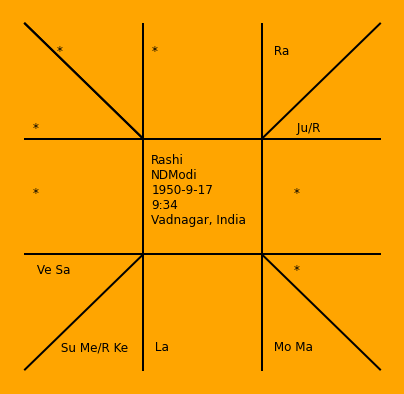

In [35]:
drawChart_Bengal()


#Vimsottari Dasha Calculation<br>
based on [farfaraway.com](https://www.farfaraway.co/blog/vimshottari-dasha-based-astrology-predictions)    


In [36]:


MoonLon = GLon["Mo"]
DashaSeq = ['Ke','Ve','Su','Mo','Ma','Ra','Ju','Sa','Me']     # Sequence of Dashas
DashaDurY = [7,20,6,10,7,18,16,19,17]                         # Duration of Dasha in years
DashaDurD = list(map(lambda x : round(x*365.25), DashaDurY))            # Duration of Dasha in days

def nextDasha(c):
    n = c+1
    if (n>8):
        n = 0
    return(n)




#MoonLon = 359.999
#MoonLon = 0


Naks = 1 + int(MoonLon//13.333333) 
pArc = MoonLon % 13.333333                                    # Arc traversed into Nakshatra
rArc = 13.333 - MoonLon % 13.333333                           # Arc remaining of Nakshatra
BirthDasha = (Naks % 9) - 1                                   # Dasha at Birth
print(Naks, rArc, BirthDasha,DashaSeq[BirthDasha])
#print(pDate,pTime)

now = datetime.now()
print(now.strftime("%d %b %Y"))

bDate = datetime.strptime(pDate +' '+pTime,'%Y-%m-%d %H:%M')       # Date-Time of Birth
print("Birth Date",bDate.strftime("%d %b %Y"))
BirthDashaDuration = DashaDurD[BirthDasha]
BirthDashaDaysPast = int ((pArc/13.3333)*BirthDashaDuration)
BirthDashaDaysLeft = int ((rArc/13.3333)*BirthDashaDuration)

BirthDashaStart = bDate - timedelta(days=BirthDashaDaysPast)
BirthDashaEnd = bDate + timedelta(days=BirthDashaDaysLeft)
#print(BirthDashaStart.strftime("%d %b %Y"))
#print(BirthDashaEnd.strftime("%d %b %Y"))
printLine = '\n ---------- \n Vimsottari Dasha \n ------------ \n'
f1.write(printLine)



17 8.727328000000002 7 Sa
08 Jan 2022
Birth Date 17 Sep 1950


48

In [37]:
DashaRecord = []                                     # Sequence and Start of all Dasha
EndOfDasha = BirthDashaEnd
Dasha = BirthDasha
CurrentDashaFound = False
for i in range(0,9):
    #print(DashaNumber)
    Rec = [Dasha,EndOfDasha]
    #print(Rec)
    DashaRecord.append(Rec)
    if (EndOfDasha > now) and not CurrentDashaFound:
        CurrentDashaCount = i                                   # Sequence of Current Dasha from BirthDasha = 0
        CurrentDasha = Dasha                                    # Sequence of Current Dasha from Ke-dasha = 0  
        EndOfCurrentDasha = EndOfDasha
        StartOfCurrentDasha = EndOfCurrentDasha - timedelta(days=DashaDurD[Dasha])
        CurrentDashaFound = True
        
    printLine = DashaSeq[Dasha] + " Dasha Ends " + EndOfDasha.strftime("%d %b %Y")
    print(printLine)
    f1.write(printLine+'\n')
    Dasha = nextDasha(Dasha)
    EndOfDasha = EndOfDasha + timedelta(days=DashaDurD[Dasha])
    

#print(DashaRecord)  
#print(CurrentDasha)
printLine = '\n ---------- \n Current ' + DashaSeq[CurrentDasha] + " Starts " + StartOfCurrentDasha.strftime("%d %b %Y") +" Ends " + EndOfCurrentDasha.strftime("%d %b %Y")
print(printLine)
f1.write(printLine+'\n')

Sa Dasha Ends 23 Feb 1963
Me Dasha Ends 23 Feb 1980
Ke Dasha Ends 23 Feb 1987
Ve Dasha Ends 23 Feb 2007
Su Dasha Ends 23 Feb 2013
Mo Dasha Ends 23 Feb 2023
Ma Dasha Ends 23 Feb 2030
Ra Dasha Ends 23 Feb 2048
Ju Dasha Ends 23 Feb 2064

 ---------- 
 Current Mo Starts 23 Feb 2013 Ends 23 Feb 2023


62

In [38]:
def SubDasha(d,eod):                                    # which kind of Dasha, Ke = 0, and EndOfDasha
    sod = eod - timedelta(days=DashaDurD[d])            # StartOfDasha, calculated backward from EndOfDasha   
    
    printLine = DashaSeq[d] +' Dasha ' + sod.strftime("%d %b %Y") + ' to ' + eod.strftime("%d %b %Y") +'\n'
    print(printLine)
    f1.write(printLine+'\n')
    scale = DashaDurY[d]/120                            # subDasha are scaled proportionatly
    
    sd = d
    sdDur = timedelta(days=round(scale*DashaDurD[sd]))
    eosd = sod + sdDur                                  # end of first subDasha calculated by scaling
    
    for j in range(0,9):
        
        printLine = DashaSeq[d]+' '+DashaSeq[sd] + " Ends " + eosd.strftime("%d %b %Y")
        print(printLine)
        f1.write(printLine+'\n')
        sd = nextDasha(sd)
        sdDur = timedelta(days=round(scale*DashaDurD[sd]))
        if (j < 8):
            eosd = eosd + sdDur
    error = (eosd - eod).days
    printLine = "Cumulative error " +str(error) + " days \n" + "-"*10
    print(printLine)
    f1.write(printLine+'\n')
        
    

    
#SubDasha(CurrentDasha, EndOfCurrentDasha)
#print(DashaRecord)
#print(CurrentDashaCount)
#print(DashaRecord[CurrentDashaCount])
SubDasha(DashaRecord[CurrentDashaCount][0], DashaRecord[CurrentDashaCount][1])
SubDasha(DashaRecord[nextDasha(CurrentDashaCount)][0], DashaRecord[nextDasha(CurrentDashaCount)][1])

Mo Dasha 23 Feb 2013 to 23 Feb 2023

Mo Mo Ends 24 Dec 2013
Mo Ma Ends 25 Jul 2014
Mo Ra Ends 24 Jan 2016
Mo Ju Ends 25 May 2017
Mo Sa Ends 24 Dec 2018
Mo Me Ends 24 May 2020
Mo Ke Ends 23 Dec 2020
Mo Ve Ends 24 Aug 2022
Mo Su Ends 23 Feb 2023
Cumulative error 0 days 
----------
Ma Dasha 23 Feb 2023 to 23 Feb 2030

Ma Ma Ends 22 Jul 2023
Ma Ra Ends 08 Aug 2024
Ma Ju Ends 15 Jul 2025
Ma Sa Ends 24 Aug 2026
Ma Me Ends 21 Aug 2027
Ma Ke Ends 17 Jan 2028
Ma Ve Ends 18 Mar 2029
Ma Su Ends 24 Jul 2029
Ma Mo Ends 22 Feb 2030
Cumulative error -1 days 
----------


#Generate Reports

In [39]:
f1.write('\n**************************************************** Jai Parashar')
f1.close()


In [40]:
# this is required to remove a whole lot of ugly double quotes from the file
!sed 's/"//g' CurrentReport.txt > CurrentReport2.txt
#!cat CurrentReport2.txt

## Generate DOCX file

In [41]:
f3 = open("CurrentReport2.txt","r")
reportContents =f3.read()
f3.close()

In [42]:


ReportFile = pName+ChartType+'.docx'


document = Document()
section = document.sections[0]
header = section.header
footer = section.footer


heading_1 = pName +" >>> "+ChartType
document.add_heading(heading_1, 0)


#heading_1 = ChartType+" Chart of "+pName
heading_2 = pDate+" "+pTime+" "+pPlace

#document.add_heading(heading_1, level=2)
document.add_heading(heading_2, level=3)

document.add_picture('./CurrentChart.png', width=Inches(4.25))

p = document.add_paragraph(reportContents)

header01 = header.paragraphs[0]
header01.text = "Parashar21 >> http://parashar21.blogspot.com"

now = datetime.now()
print(now.strftime("%d %b %Y"))

footer01 = footer.paragraphs[0]
footer01.text = "Printed on : "+now.strftime("%d %b %Y")


#document.add_page_break()

document.save(ReportFile)

08 Jan 2022


#Chronobooks <br>
![alt text](https://1.bp.blogspot.com/-lTiYBkU2qbU/X1er__fvnkI/AAAAAAAAjtE/GhDR3OEGJr4NG43fZPodrQD5kbxtnKebgCLcBGAsYHQ/s600/Footer2020-600x200.png)<hr>
Chronotantra and Chronoyantra are two science fiction novels that explore the collapse of human civilisation on Earth and then its rebirth and reincarnation both on Earth as well as on the distant worlds of Mars, Titan and Enceladus. But is it the human civilisation that is being reborn? Or is it some other sentience that is revealing itself. 
If you have an interest in AI and found this material useful, you may consider buying these novels, in paperback or kindle, from [http://bit.ly/chronobooks](http://bit.ly/chronobooks)